In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [8]:
iter_csv = pd.read_table('./data/mapaffil2015.tsv', sep='\t', encoding='latin-1',\
                         dtype={'PMID': object, 
                                'au_order': np.int64, 
                                'affiliation': object,
                                'type': object, 
                                'city': object, 
                                'state':object, 
                                'country': object,
                                'lat': object, 
                                'lon': object, 
                                'fips': np.float64},\
                         iterator=True, chunksize=10**6)
mapAffil = pd.concat([chunk[pd.notnull(chunk['fips'])] for chunk in iter_csv])

# mapAffil = pd.read_table('./data/mapaffil2015.tsv', sep='\t', encoding='latin-1',\
#                          dtype={'PMID': np.int32, 'au_order': np.int32},\
#                          nrows=10000)

KeyboardInterrupt: 

In [9]:
mapAffil.head()

,PMID,au_order,affiliation,type,city,state,country,lat,lon,fips
13,26151952,1,Department of Pharmacology and Toxicology Coll...,EDU,"Tucson, AZ, USA",AZ,USA,32.222,-110.97,4019.0
14,26151951,1,"Department of Epidemiology, University of Cali...",EDU,"Los Angeles, CA, USA",CA,USA,34.053,-118.245,6037.0
15,26151950,1,"Department of Preventive Medicine, Icahn Schoo...",EDU,"Manhattan, New York, NY, USA",NY,USA,40.79,-73.96,36061.0
75,26151925,3,"Center for Pain and the Brain, Department of A...",EDU-HOS,"Boston, MA, USA",MA,USA,42.359,-71.057,25025.0
128,26151913,8,"Gladstone Institute of Cardiovascular Disease,...",ORG,"San Francisco, CA, USA",CA,USA,37.779,-122.42,6075.0


In [53]:
mapAffil['au_order'].unique()

array([1, 3, 8, ..., '16', '14', '19'], dtype=object)

In [54]:
mapAffil.reset_index(inplace=True)

10043344

In [75]:
mapAffil['PMID'] = pd.to_numeric(mapAffil['PMID'], errors='coerce')

In [77]:
mapAffil['au_order'] = pd.to_numeric(mapAffil['au_order'], errors='coerce')

In [10]:
mapAffil.dtypes

PMID            object
au_order        object
affiliation     object
type            object
city            object
state           object
country         object
lat             object
lon             object
fips           float64
dtype: object

In [11]:
mapAffil.shape
map

(10043344, 10)

In [ ]:
# mapAffil.to_csv('./data/mapAffil_US.tsv', sep='\t')

In [ ]:
mapAffil = mapAffil.drop('index', 1)

In [184]:
au_by_pmid = mapAffil.groupby('PMID').count()['au_order']

In [215]:
au_by_pmid.head()

PMID
32     5
34     2
47     1
132    2
169    3
Name: au_order, dtype: int64

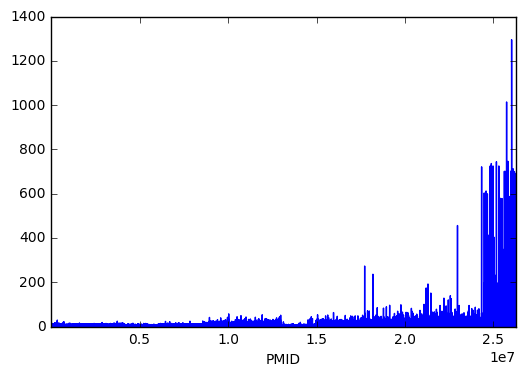

In [186]:
au_by_pmid.plot()
plt.show()

In [112]:
count_PMID_by_fips = mapAffil.groupby('fips').PMID.nunique()

In [214]:
count_PMID_by_fips.head()

fips
1001.0     2
1003.0    40
1015.0    73
1021.0     1
1031.0     2
Name: PMID, dtype: int64

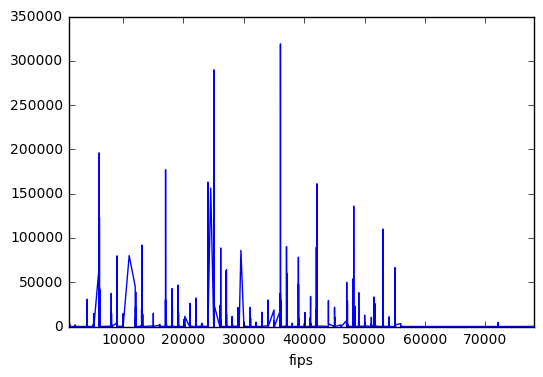

In [115]:
count_PMID_by_fips.plot()
plt.show()

In [161]:
PMID_count = pd.DataFrame(count_PMID_by_fips)
PMID_count = PMID_count.reset_index()

In [211]:
PMID_count.columns = ['fips', 'PMID_count']
PMID_count.head()

,fips,PMID_count
0,1001.0,2
1,1003.0,40
2,1015.0,73
3,1021.0,1
4,1031.0,2


In [189]:
author_count = pd.DataFrame(au_by_pmid)
author_count = author_count.reset_index()

In [210]:
author_count.columns = ['PMID', 'author_count']
author_count.head()

,PMID,author_count
0,32,5
1,34,2
2,47,1
3,132,2
4,169,3


In [196]:
mapAffil = pd.merge(mapAffil, PMID_count, on='fips', how='left')
mapAffil = pd.merge(mapAffil, author_count, on='PMID', how='left')

In [199]:
mapAffil.head()

,index,PMID,au_order,affiliation,type,city,state,country,lat,lon,fips,PMID_count,author_count
0,13,26151952,1,Department of Pharmacology and Toxicology Coll...,EDU,"Tucson, AZ, USA",AZ,USA,32.222,-110.970,4019.0,30727,1
1,14,26151951,1,"Department of Epidemiology, University of Cali...",EDU,"Los Angeles, CA, USA",CA,USA,34.053,-118.245,6037.0,196018,1
2,15,26151950,1,"Department of Preventive Medicine, Icahn Schoo...",EDU,"Manhattan, New York, NY, USA",NY,USA,40.790,-73.960,36061.0,319070,1
3,75,26151925,3,"Center for Pain and the Brain, Department of A...",EDU-HOS,"Boston, MA, USA",MA,USA,42.359,-71.057,25025.0,289706,1
4,128,26151913,8,"Gladstone Institute of Cardiovascular Disease,...",ORG,"San Francisco, CA, USA",CA,USA,37.779,-122.420,6075.0,103866,1


**This PMID looks correct: au_order starts at 1 and counts up to the author_count**

In [212]:
mapAffil[mapAffil.PMID == 26151911]

,index,PMID,au_order,affiliation,type,city,state,country,lat,lon,fips,PMID_count,author_count
5,132,26151911,1,Department of Psychiatry and Behavioral Scienc...,EDU,"Atlanta, GA, USA",GA,USA,33.748,-84.391,13121.0,91872,6
6,133,26151911,2,Department of Psychiatry and Behavioral Scienc...,EDU,"Atlanta, GA, USA",GA,USA,33.748,-84.391,13121.0,91872,6
7,134,26151911,3,Department of Psychiatry and Behavioral Scienc...,EDU,"Atlanta, GA, USA",GA,USA,33.748,-84.391,13121.0,91872,6
8,135,26151911,4,"Department of Biomedical Engineering, Emory Un...",EDU,"Atlanta, GA, USA",GA,USA,33.748,-84.391,13121.0,91872,6
9,136,26151911,5,Department of Psychiatry and Behavioral Scienc...,EDU,"Atlanta, GA, USA",GA,USA,33.748,-84.391,13121.0,91872,6
10,137,26151911,6,Department of Psychiatry and Behavioral Scienc...,EDU,"Atlanta, GA, USA",GA,USA,33.748,-84.391,13121.0,91872,6


In [218]:
print('max number of unique PMIDs per county=',mapAffil['PMID_count'].max())
print('max number of author contributions per PMID=',mapAffil['author_count'].max())

max number of unique PMIDs per county= 319070
max number of author contributions per PMID= 1295


### NY (fips 36061) has highest amount of publications (562360) 

In [219]:
mapAffil[mapAffil['PMID_count'] == mapAffil['PMID_count'].max()]

,index,PMID,au_order,affiliation,type,city,state,country,lat,lon,fips,PMID_count,author_count
2,15,26151950,1,"Department of Preventive Medicine, Icahn Schoo...",EDU,"Manhattan, New York, NY, USA",NY,USA,40.790,-73.960,36061.0,319070,1
62,376,26151848,6,"Behavioral Core Facility, Department of Neuros...",EDU,"Bronx, New York, NY, USA",NY,USA,40.792,-73.954,36061.0,319070,6
110,514,26151821,32,"Division of Epidemiology, Department of Popula...",EDU,"Manhattan, New York, NY, USA",NY,USA,40.790,-73.960,36061.0,319070,75
163,613,26151807,1,"Ferkauf Graduate School of Psychology, Yeshiva...",EDU,"Bronx, New York, NY, USA",NY,USA,40.792,-73.954,36061.0,319070,1
235,990,26151676,2,"Department of Oncology and Internal Medicine, ...",HOS,"New York, NY, USA",NY,USA,40.714,-74.007,36061.0,319070,6
359,1520,26151532,1,Lincoln Medical and Mental Health Center Bronx...,EDU-HOS,"Manhattan, New York, NY, USA",NY,USA,40.790,-73.960,36061.0,319070,1
529,2226,26151351,1,Departments of *Emergency Medicine and dagger ...,HOS,"Brooklyn, New York, NY, USA",NY,USA,40.725,-73.988,36061.0,319070,1
626,2533,26151266,43,"City College of New York, New York, New York.",EDU,"New York, NY, USA",NY,USA,40.714,-74.007,36061.0,319070,17
629,2541,26151266,51,"Columbia University Medical Center, New York, ...",EDU-HOS,"New York, NY, USA",NY,USA,40.714,-74.007,36061.0,319070,17
632,2572,26151266,82,"Albert Einstein College of Medicine, New York,...",EDU,"Bronx, New York, NY, USA",NY,USA,40.792,-73.954,36061.0,319070,17


### PMID #26024162 has 1295 records(authors?) in the data set
- authors from many affiliated states, counties
- no au_order "1"

In [207]:
mapAffil[mapAffil['author_count'] == mapAffil['author_count'].max()].sort_values(by='au_order', axis=0)

,index,PMID,au_order,affiliation,type,city,state,country,lat,lon,fips,PMID_count,author_count
127148,518721,26024162,2,Homer L. Dodge Department of Physics and Astro...,EDU,"Norman, OK, USA",OK,USA,35.221,-97.447,40027.0,3678,1295
127149,518725,26024162,6,"Department of Physics and Astronomy, Michigan ...",EDU,"East Lansing, MI, USA",MI,USA,42.738,-84.484,26065.0,23948,1295
127150,518733,26024162,14,"Physics Department, Brookhaven National Labora...",ORG,"Upton, NY, USA",NY,USA,40.863,-72.888,36103.0,29878,1295
127151,518734,26024162,15,"Department of Physics, Northern Illinois Unive...",EDU,"DeKalb, IL, USA",IL,USA,41.929,-88.749,17037.0,2072,1295
127152,518740,26024162,21,"Department of Physics, Boston University, Bost...",EDU,"Boston, MA, USA",MA,USA,42.359,-71.057,25025.0,289706,1295
127153,518756,26024162,37,Homer L. Dodge Department of Physics and Astro...,EDU,"Norman, OK, USA",OK,USA,35.221,-97.447,40027.0,3678,1295
127154,518759,26024162,40,"Enrico Fermi Institute, University of Chicago,...",EDU,"Chicago, IL, USA",IL,USA,41.884,-87.632,17031.0,176903,1295
127155,518760,26024162,41,"Nevis Laboratory, Columbia University, Irvingt...",EDU,"Irvington, NY, USA",NY,USA,41.039,-73.868,36119.0,15226,1295
127156,518767,26024162,48,"Nevis Laboratory, Columbia University, Irvingt...",EDU,"Irvington, NY, USA",NY,USA,41.039,-73.868,36119.0,15226,1295
127157,518771,26024162,52,"Physics Division, Lawrence Berkeley National L...",EDU,"Berkeley, CA, USA",CA,USA,37.870,-122.271,6001.0,65527,1295


***au_order number not equal to the record count for that PMID***

In [208]:
mapAffil[mapAffil['PMID'] == 26151913]

,index,PMID,au_order,affiliation,type,city,state,country,lat,lon,fips,PMID_count,author_count
4,128,26151913,8,"Gladstone Institute of Cardiovascular Disease,...",ORG,"San Francisco, CA, USA",CA,USA,37.779,-122.42,6075.0,103866,1
